<a href="https://colab.research.google.com/github/LeonardoDelgado1905/ParallelComputing/blob/master/SobelImageGPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%cd /usr/local/cuda-11.0/samples/1_Utilities/deviceQuery
!make
!./deviceQuery

/usr/local/cuda-11.0/samples/1_Utilities/deviceQuery
/usr/local/cuda-11.0/bin/nvcc -ccbin g++ -I../../common/inc  -m64    -gencode arch=compute_35,code=sm_35 -gencode arch=compute_37,code=sm_37 -gencode arch=compute_50,code=sm_50 -gencode arch=compute_52,code=sm_52 -gencode arch=compute_60,code=sm_60 -gencode arch=compute_61,code=sm_61 -gencode arch=compute_70,code=sm_70 -gencode arch=compute_75,code=sm_75 -gencode arch=compute_80,code=sm_80 -gencode arch=compute_80,code=compute_80 -o deviceQuery.o -c deviceQuery.cpp
nvcc warning : The 'compute_35', 'compute_37', 'compute_50', 'sm_35', 'sm_37' and 'sm_50' architectures are deprecated, and may be removed in a future release (Use -Wno-deprecated-gpu-targets to suppress warning).
/usr/local/cuda-11.0/bin/nvcc -ccbin g++   -m64      -gencode arch=compute_35,code=sm_35 -gencode arch=compute_37,code=sm_37 -gencode arch=compute_50,code=sm_50 -gencode arch=compute_52,code=sm_52 -gencode arch=compute_60,code=sm_60 -gencode arch=compute_61,code=

In [ ]:
#@title cuda Install
!echo CUDA AND NVIDIA INSTALLATION
!echo NOTE: THERE IS A QUESTION IN THE INSTALLATION, PLEASE DO NOT FORGET TO ANSWER IT (YOU CAN CHOOSE Y)
!wget https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1604/x86_64/cuda-repo-ubuntu1604_8.0.61-1_amd64.deb;
!dpkg -i cuda-repo-ubuntu1604_8.0.61-1_amd64.deb;
!apt-get update -qq;
!apt-get install cuda-8.0;
!ln -sf /usr/local/cuda-8.0 /usr/local/cuda
import os
os.environ['PATH'] += ':/usr/local/cuda/bin'
os.environ['LD_LIBRARY_PATH'] += ':/usr/local/cuda/lib'

!apt-get install gcc-5 g++-5 -y -qq;
!ln -s /usr/bin/gcc-5 /usr/local/cuda/bin/gcc;
!ln -s /usr/bin/g++-5 /usr/local/cuda/bin/g++;

CUDA AND NVIDIA INSTALLATION
/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: `echo NOTE: THERE IS A QUESTION IN THE INSTALLATION, PLEASE DO NOT FORGET TO ANSWER IT (YOU CAN CHOOSE Y)'
--2022-01-18 16:50:18--  https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1604/x86_64/cuda-repo-ubuntu1604_8.0.61-1_amd64.deb
Resolving developer.download.nvidia.com (developer.download.nvidia.com)... 152.195.19.142
Connecting to developer.download.nvidia.com (developer.download.nvidia.com)|152.195.19.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2690 (2.6K) [application/x-deb]
Saving to: ‘cuda-repo-ubuntu1604_8.0.61-1_amd64.deb’

cuda-repo-ubuntu160 100%[===================>]   2.63K  --.-KB/s    in 0s      

2022-01-18 16:50:18 (150 MB/s) - ‘cuda-repo-ubuntu1604_8.0.61-1_amd64.deb’ saved [2690/2690]

Selecting previously unselected package cuda-repo-ubuntu1604.
(Reading database ... 155229 files and directories currently 

In [ ]:
!pip install git+git://github.com/andreinechaev/nvcc4jupyter.git
%load_ext nvcc_plugin

  Cloning git://github.com/andreinechaev/nvcc4jupyter.git to /tmp/pip-req-build-hk27ffhi
  Running command git clone -q git://github.com/andreinechaev/nvcc4jupyter.git /tmp/pip-req-build-hk27ffhi
  Created wheel for NVCCPlugin: filename=NVCCPlugin-0.0.2-py3-none-any.whl size=4306 sha256=dec2c7b340b43a688611237f5308ab3667d146c721931d1b76427e3d2fa66bb4
  Stored in directory: /tmp/pip-ephem-wheel-cache-ln0lk9vc/wheels/c5/2b/c0/87008e795a14bbcdfc7c846a00d06981916331eb980b6c8bdf
Successfully built NVCCPlugin
created output directory at /usr/local/cuda-11.0/samples/1_Utilities/deviceQuery/src
Out bin /usr/local/cuda-11.0/samples/1_Utilities/deviceQuery/result.out


## Sobel Image

In [ ]:
%cd /content

/content


In [ ]:
!git clone https://github.com/nothings/stb.git

Cloning into 'stb'...
remote: Enumerating objects: 7844, done.
remote: Counting objects: 100% (573/573), done.
remote: Compressing objects: 100% (209/209), done.
remote: Total 7844 (delta 372), reused 544 (delta 364), pack-reused 7271
Receiving objects: 100% (7844/7844), 5.45 MiB | 27.10 MiB/s, done.
Resolving deltas: 100% (5217/5217), done.


In [ ]:
%cp -R stb/. /usr/include/.

In [ ]:
!git clone https://github.com/LeonardoDelgado1905/ParallelComputing.git

Cloning into 'ParallelComputing'...
remote: Enumerating objects: 215, done.
remote: Total 215 (delta 0), reused 0 (delta 0), pack-reused 215
Receiving objects: 100% (215/215), 332.79 MiB | 45.96 MiB/s, done.
Resolving deltas: 100% (90/90), done.
Checking out files: 100% (84/84), done.


In [ ]:
%cp -R ParallelComputing/lab1/1080p/. ./1080
%cp -R ParallelComputing/lab1/4k/. ./4k
%cp -R ParallelComputing/lab1/720p/. ./720p

In [ ]:
ls

1080/  4k/  720p/  ParallelComputing/  sample_data/  stb/


In [ ]:
import cv2
import matplotlib.pyplot as plt

In [ ]:
def print_img(name):
  image = cv2.imread(name)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  plt.imshow(image)

In [ ]:
%ls

1080/  4k/  720p/  ParallelComputing/  sample_data/  stb/


In [ ]:
%%cuda --name sobel.cu --compile false

#include <stdio.h>
#include <stdlib.h>
#include <math.h>
#include <time.h>
#include <omp.h>
#include <sys/time.h>
#define STB_IMAGE_IMPLEMENTATION
#include <stb_image.h>
#define STB_IMAGE_WRITE_IMPLEMENTATION
#include <stb_image_write.h>

#define BLOCKSPERGRID  512
#define NUMTHREADS 8192


/*****************************************************************************
/*kernel
*****************************************************************************/

__global__ void handleGray(unsigned char *grayImage, unsigned char *image, int size, int totalThreads)
{   
    int start, end;
    int index = (blockDim.x * blockIdx.x) + threadIdx.x;      
    start = (size/totalThreads) * index;
    end = start + (size/totalThreads) - 1;
    int i = start;
 
    do{
        *(grayImage + i) = ((*(image + (i * 3)) + *(image + (i * 3) + 1) + *(image + (i * 3) + 2))/3.0);
        i++;
    }while(i <= end);
 
}

__global__ void handleSobel(int size, unsigned char *gray_img, unsigned char *sobel_img, int width, int height, int totalThreads)
{   
    int start, end;  
    int index = (blockDim.x * blockIdx.x) + threadIdx.x;  

    start = (size/totalThreads) * index;
    end = start + (size/totalThreads) - 1;
    if(index %10 == 0 && 0){
      printf("index: %d, Start: %d \n", index, start);
      printf("index: %d, End: %d \n", index, end);
    }
    
    
 
    unsigned char *p = gray_img + start;
    unsigned char *pg = sobel_img + start;
    long long i = start;
    do{  
        pg++;
        p++;
        i++;
        int conv[] = {-1,-1,-1,-1,8,-1,-1,-1,-1};
        size_t pos = p - gray_img;
        if(pos % width == 0 || pos % (width-1) == 0 || (pos/width) % (height-1) == 0) { 
            *pg = 0;
            continue;
        }
        int new_val = *(p-width-1) * *(conv) + *(p-width) * *(conv+1) + *(p-width+1) * *(conv+2) + 
            *(p-1) * *(conv+3) + *p * *(conv+4) + *(p+1) * *(conv+5) + 
            *(p+width-1) * *(conv+6) + *(p+width) * *(conv+7) + *(p+width+1) * *(conv+8) ;
        *(pg) = new_val < 0 ? 0 : new_val;
        
    }while(i <= end);
 
}

/******************************************************************************/

int main(int argc, char** argv) {
    /*Declaración de variables para medir el tiempo de procesamiento y escibirlo en
    un archivo de texto plano*/
    int width, height, channels, blocksPerGrid, threadsPerBlock, totalThreads;
    unsigned char *h_gray_img, *d_gray_img, *d_img, *h_sobel_img, *d_sobel_img;

    
    cudaError_t err = cudaSuccess;

    if(argc != 5){
        printf("beware of usage: ./sobel_image input_image output_image num_threads \n");
        return 0;

    }
    //Asignamos los nombres de input y output para las imágenes en variables
    char* input = argv[1];
    char* output = argv[2];
    int thread_count = atoi(argv[3]);
    int block_count = atoi(argv[4]);
    //int block_treads = 
    blocksPerGrid = block_count;

    //Cargamos la imagen con el nombre de input ingresado
    unsigned char *h_img = stbi_load(input, &width, &height, &channels, 0);
    if(h_img == NULL) {
        printf("Error in loading the image\n");
        exit(1);
    }

    //Creamos variables para convertir la imagen de input a tonalidades de gris
    int gray_channels = 1;
    int img_size = width * height * channels;
    int gray_img_size = width * height * gray_channels;

    err = cudaMalloc((void **)&d_img, img_size);
    if (err != cudaSuccess){
        fprintf(stderr, "Failed to allocate device image (error code %s)!\n", cudaGetErrorString(err));
        exit(EXIT_FAILURE);
    }

    err = cudaMemcpy(d_img, h_img, img_size, cudaMemcpyHostToDevice);
    if (err != cudaSuccess){
        fprintf(stderr, "Failed to copy image from host to device (error code %s)!\n", cudaGetErrorString(err));
        exit(EXIT_FAILURE);
    }

    //Utilizamos memoria dinámica para el número de bits de la imagen en gris
    h_gray_img = (unsigned char *)malloc(gray_img_size);
    if(h_gray_img == NULL) {
        printf("Unable to allocate memory for the host gray image.\n");
        exit(1);
    }
    
    err = cudaMalloc((void **)&d_gray_img, gray_img_size);
    if (err != cudaSuccess){
        fprintf(stderr, "Failed to allocate device gray image (error code %s)!\n", cudaGetErrorString(err));
        exit(EXIT_FAILURE);
    }

    err = cudaMemcpy(d_gray_img, h_gray_img, gray_img_size, cudaMemcpyHostToDevice);
    if (err != cudaSuccess){
        fprintf(stderr, "Failed to copy vector C from device to host (error code %s)!\n", cudaGetErrorString(err));
        exit(EXIT_FAILURE);
    }    

   //Ejecutamos el kernel para la conversión a escala de grises de la imagen
    threadsPerBlock = thread_count/blocksPerGrid;
    totalThreads = blocksPerGrid * threadsPerBlock;
    printf("CUDA kernel launch with %d blocks of %d threads Total: %i     ", blocksPerGrid, threadsPerBlock, totalThreads);
    handleGray<<<blocksPerGrid, threadsPerBlock>>>(d_gray_img,   d_img, gray_img_size,  totalThreads);
    err = cudaGetLastError();
    if (err != cudaSuccess){
        fprintf(stderr, "Failed to launch handleGray kernel (error code %s)!\n", cudaGetErrorString(err));
        exit(EXIT_FAILURE);
    }
    
    
    err = cudaMemcpy(h_gray_img, d_gray_img, gray_img_size, cudaMemcpyDeviceToHost);
    if (err != cudaSuccess){
        fprintf(stderr, "Failed to copy gray image from device to host (error code %s)!\n", cudaGetErrorString(err));
        exit(EXIT_FAILURE);
    }
    stbi_write_png("gris.png", width, height, gray_channels, h_gray_img, width * gray_channels);
    

    //Utilizamos memoria dinámica para el número de bits de la imagen sobel
    h_sobel_img = (unsigned char *)malloc(gray_img_size);
    if(h_sobel_img == NULL) {
        printf("Unable to allocate memory for the host h_sobel_img.\n");
        exit(1);
    }
    
    err = cudaMalloc((void **)&d_sobel_img, gray_img_size);
    if (err != cudaSuccess){
        fprintf(stderr, "Failed to allocate device h_sobel_img (error code %s)!\n", cudaGetErrorString(err));
        exit(EXIT_FAILURE);
    }

    err = cudaMemcpy(d_sobel_img, h_sobel_img, gray_img_size, cudaMemcpyHostToDevice);
    if (err != cudaSuccess){
        fprintf(stderr, "Failed to copy sobel image from host to device (error code %s)!\n", cudaGetErrorString(err));
        exit(EXIT_FAILURE);
    }    

    //Ejecutamos el kernel para la aplicación de sobel
    
    printf("CUDA kernel launch with %d blocks of %d threads Total: %i     ", blocksPerGrid, threadsPerBlock, totalThreads  );
    handleSobel<<<blocksPerGrid, threadsPerBlock>>>(gray_img_size, d_gray_img,  d_sobel_img, width,  height, totalThreads);
    err = cudaGetLastError();
    if (err != cudaSuccess){
        fprintf(stderr, "Failed to launch handleSobel kernel (error code %s)!\n", cudaGetErrorString(err));
        exit(EXIT_FAILURE);
    }

    //printf("Count: %d \n", count);

    err = cudaMemcpy(h_sobel_img, d_sobel_img, gray_img_size, cudaMemcpyDeviceToHost);
    if (err != cudaSuccess){
        fprintf(stderr, "Failed to copy sobel image from device to host (error code %s)!\n", cudaGetErrorString(err));
        exit(EXIT_FAILURE);
    }

    stbi_write_png(output, width, height, gray_channels, h_sobel_img, width * gray_channels);    
    
    
    //Liberamos las memorias dinámicas de host y device
    err = cudaFree(d_img);
    if (err != cudaSuccess){
        fprintf(stderr, "Failed to free device d_img (error code %s)!\n", cudaGetErrorString(err));
        exit(EXIT_FAILURE);
    }

    err = cudaFree(d_gray_img);
    if (err != cudaSuccess){
        fprintf(stderr, "Failed to free device d_gray_img (error code %s)!\n", cudaGetErrorString(err));
        exit(EXIT_FAILURE);
    }

    err = cudaFree(d_sobel_img);
    if (err != cudaSuccess){
        fprintf(stderr, "Failed to free device d_sobel_img (error code %s)!\n", cudaGetErrorString(err));
        exit(EXIT_FAILURE);
    }
    stbi_image_free(h_img);
    free(h_gray_img);
    free(h_sobel_img);    
    
    //Imprimimos la información 
    //printf("The execution time for %s with resolution: %dx%d and %d threads was: %f \n", input, width, height, thread_count, time_spent);
}
//change

TypeError: ignored

In [ ]:
%%cuda --name sobel_test.cu --compile false

#include <stdio.h>
#include <stdlib.h>
#include <math.h>
#include <time.h>
#include <omp.h>
#include <sys/time.h>
#define STB_IMAGE_IMPLEMENTATION
#include <stb_image.h>
#define STB_IMAGE_WRITE_IMPLEMENTATION
#include <stb_image_write.h>

#define BLOCKSPERGRID  512
#define NUMTHREADS 8192


/*****************************************************************************
/*kernel
*****************************************************************************/

__global__ void handleGray(unsigned char *gray_img, unsigned char *img, int width, int height, int totalThreads)
{   
    int start, end;
    int index = (blockDim.x * blockIdx.x) + threadIdx.x;
    start = (height/totalThreads) * index;
    end = start + (height/totalThreads) - 1;
 
    if(height < (index + 1)*(height/totalThreads)){
        end = height - 1;
    }
    int i = start;
    do{
        
        for(int j = 0; j < width; j++){
            unsigned char *dir_gray_pixel = gray_img + i*width + j;
            unsigned char *dir_ch_pixel = img + 3*(i*width + j);
            *dir_gray_pixel = (uint8_t)((*dir_ch_pixel + *(dir_ch_pixel + 1) + *(dir_ch_pixel + 2))/3.0);
            //printf("i: %d, j: %d", i, j);
        }
        i++;
    }while(i <= end);
 
}


__global__ void handleSobel(unsigned char *gray_img, unsigned char *sobel_img, int width, int height, int totalThreads)
{   
    int start, end;
    int index = (blockDim.x * blockIdx.x) + threadIdx.x;
    start = (height/totalThreads) * index;
    end = start + (height/totalThreads) - 1;
 
    if(height < (index + 1)*(height/totalThreads)){
        end = height - 1;
    }
    //printf("I start in the %dth row and finish at the %dth row\nrelationship %d, %d, %d\n", start, end, height, totalThreads, (height/totalThreads));
    int i = start;
    int conv[3][3] = {
        {-1, -1, -1},
        {-1, 8, -1},
        {-1, -1, -1}    
    };
    do{
        for(int j = 0; j < width; j++){
            unsigned char *dir_sobel_pixel = sobel_img + i*width + j;
            unsigned char *dir_gray_pixel = gray_img + i*width + j;   
            int sum = 0;
            if(i == 0 || i == (height-1) || j == 0 || j == (width - 1)){
                *dir_sobel_pixel = (uint8_t)sum;
            }else{
                for(int k = -1; k <= 1; ++k){
                    for(int l = -1; l <= 1; ++l){
                        unsigned char *dir_n_pixel = dir_gray_pixel + k*width + l;
                        sum += *dir_n_pixel * conv[k+1][l+1];
                    }
                }
                sum = sum < 0 ? 0 : sum;
                *dir_sobel_pixel = (uint8_t)sum;
            }
        }
        i++;
    }while(i <= end); 
}

/******************************************************************************/

int main(int argc, char** argv) {
    /*Declaración de variables para medir el tiempo de procesamiento y escibirlo en
    un archivo de texto plano*/
    int width, height, channels, blocksPerGrid, threadsPerBlock, totalThreads;
    unsigned char *h_gray_img, *d_gray_img, *d_img, *h_sobel_img, *d_sobel_img;

    
    cudaError_t err = cudaSuccess;

    if(argc != 5){
        printf("beware of usage: ./sobel_image input_image output_image num_threads \n");
        return 0;

    }
    //Asignamos los nombres de input y output para las imágenes en variables
    char* input = argv[1];
    char* output = argv[2];
    int thread_count = atoi(argv[3]);
    int block_count = atoi(argv[4]);
    //int block_treads = 
    blocksPerGrid = block_count;

    //Cargamos la imagen con el nombre de input ingresado
    unsigned char *h_img = stbi_load(input, &width, &height, &channels, 0);
    if(h_img == NULL) {
        printf("Error in loading the image\n");
        exit(1);
    }

    //Creamos variables para convertir la imagen de input a tonalidades de gris
    int gray_channels = 1;
    int img_size = width * height * channels;
    int gray_img_size = width * height * gray_channels;

    err = cudaMalloc((void **)&d_img, img_size);
    if (err != cudaSuccess){
        fprintf(stderr, "Failed to allocate device image (error code %s)!\n", cudaGetErrorString(err));
        exit(EXIT_FAILURE);
    }

    err = cudaMemcpy(d_img, h_img, img_size, cudaMemcpyHostToDevice);
    if (err != cudaSuccess){
        fprintf(stderr, "Failed to copy image from host to device (error code %s)!\n", cudaGetErrorString(err));
        exit(EXIT_FAILURE);
    }

    //Utilizamos memoria dinámica para el número de bits de la imagen en gris
    h_gray_img = (unsigned char *)malloc(gray_img_size);
    if(h_gray_img == NULL) {
        printf("Unable to allocate memory for the host gray image.\n");
        exit(1);
    }
    
    err = cudaMalloc((void **)&d_gray_img, gray_img_size);
    if (err != cudaSuccess){
        fprintf(stderr, "Failed to allocate device gray image (error code %s)!\n", cudaGetErrorString(err));
        exit(EXIT_FAILURE);
    }

    err = cudaMemcpy(d_gray_img, h_gray_img, gray_img_size, cudaMemcpyHostToDevice);
    if (err != cudaSuccess){
        fprintf(stderr, "Failed to copy vector C from device to host (error code %s)!\n", cudaGetErrorString(err));
        exit(EXIT_FAILURE);
    }    

   //Ejecutamos el kernel para la conversión a escala de grises de la imagen
    threadsPerBlock = thread_count/blocksPerGrid;
    totalThreads = blocksPerGrid * threadsPerBlock;
    printf("CUDA kernel launch with %d blocks of %d threads Total: %i     ", blocksPerGrid, threadsPerBlock, totalThreads);
    handleGray<<<blocksPerGrid, threadsPerBlock>>>(d_gray_img, d_img, width, height, totalThreads);
    err = cudaGetLastError();
    if (err != cudaSuccess){
        fprintf(stderr, "Failed to launch handleGray kernel (error code %s)!\n", cudaGetErrorString(err));
        exit(EXIT_FAILURE);
    }
    
    
    err = cudaMemcpy(h_gray_img, d_gray_img, gray_img_size, cudaMemcpyDeviceToHost);
    if (err != cudaSuccess){
        fprintf(stderr, "Failed to copy gray image from device to host (error code %s)!\n", cudaGetErrorString(err));
        exit(EXIT_FAILURE);
    }
    //stbi_write_png("gris.png", width, height, gray_channels, h_gray_img, width * gray_channels);
    

    //Utilizamos memoria dinámica para el número de bits de la imagen sobel
    h_sobel_img = (unsigned char *)malloc(gray_img_size);
    if(h_sobel_img == NULL) {
        printf("Unable to allocate memory for the host h_sobel_img.\n");
        exit(1);
    }
    
    err = cudaMalloc((void **)&d_sobel_img, gray_img_size);
    if (err != cudaSuccess){
        fprintf(stderr, "Failed to allocate device h_sobel_img (error code %s)!\n", cudaGetErrorString(err));
        exit(EXIT_FAILURE);
    }

    err = cudaMemcpy(d_sobel_img, h_sobel_img, gray_img_size, cudaMemcpyHostToDevice);
    if (err != cudaSuccess){
        fprintf(stderr, "Failed to copy sobel image from host to device (error code %s)!\n", cudaGetErrorString(err));
        exit(EXIT_FAILURE);
    }    

    //Ejecutamos el kernel para la aplicación de sobel
    
    printf("CUDA kernel launch with %d blocks of %d threads Total: %i     ", blocksPerGrid, threadsPerBlock, totalThreads  );
    handleSobel<<<blocksPerGrid, threadsPerBlock>>>(d_gray_img,  d_sobel_img, width,  height, totalThreads);
    err = cudaGetLastError();
    if (err != cudaSuccess){
        fprintf(stderr, "Failed to launch handleSobel kernel (error code %s)!\n", cudaGetErrorString(err));
        exit(EXIT_FAILURE);
    }

    //printf("Count: %d \n", count);

    err = cudaMemcpy(h_sobel_img, d_sobel_img, gray_img_size, cudaMemcpyDeviceToHost);
    if (err != cudaSuccess){
        fprintf(stderr, "Failed to copy sobel image from device to host (error code %s)!\n", cudaGetErrorString(err));
        exit(EXIT_FAILURE);
    }

    //stbi_write_png(output, width, height, gray_channels, h_sobel_img, width * gray_channels);    
    
    
    //Liberamos las memorias dinámicas de host y device
    err = cudaFree(d_img);
    if (err != cudaSuccess){
        fprintf(stderr, "Failed to free device d_img (error code %s)!\n", cudaGetErrorString(err));
        exit(EXIT_FAILURE);
    }

    err = cudaFree(d_gray_img);
    if (err != cudaSuccess){
        fprintf(stderr, "Failed to free device d_gray_img (error code %s)!\n", cudaGetErrorString(err));
        exit(EXIT_FAILURE);
    }

    err = cudaFree(d_sobel_img);
    if (err != cudaSuccess){
        fprintf(stderr, "Failed to free device d_sobel_img (error code %s)!\n", cudaGetErrorString(err));
        exit(EXIT_FAILURE);
    }
    stbi_image_free(h_img);
    free(h_gray_img);
    free(h_sobel_img);    
    
    //Imprimimos la información 
    //printf("The execution time for %s with resolution: %dx%d and %d threads was: %f \n", input, width, height, thread_count, time_spent);
}
//change

TypeError: ignored

In [ ]:
%cd /usr/local/cuda-11.0/samples/1_Utilities/deviceQuery
!nvcc -o sobel.out src/sobel.cu
%cp ./sobel.out /content/
%cd /content
!time ./sobel.out 4k/bicho.jpg 4k/bicho_bordes.jpg 1080 2


In [ ]:
%cd /usr/local/cuda-11.0/samples/1_Utilities/deviceQuery
!nvcc -o sobel_test.out src/sobel_test.cu
%cp ./sobel_test.out /content/
%cd /content
!time ./sobel_test.out 4k/bicho.jpg 4k/bicho_bordes.jpg 2048 2048


/usr/local/cuda-11.0/samples/1_Utilities/deviceQuery
nvcc warning : The 'compute_20', 'sm_20', and 'sm_21' architectures are deprecated, and may be removed in a future release (Use -Wno-deprecated-gpu-targets to suppress warning).
src/sobel_test.cu(103): warning: variable "output" was declared but never referenced

src/sobel_test.cu(103): warning: variable "output" was declared but never referenced

/content
CUDA kernel launch with 2048 blocks of 1 threads Total: 2048     CUDA kernel launch with 2048 blocks of 1 threads Total: 2048     
real	0m0.526s
user	0m0.270s
sys	0m0.242s


In [ ]:
!time ./sobel_test.out 4k/bicho.jpg 4k/bicho_bordes.jpg 2048 2

CUDA kernel launch with 2 blocks of 1024 threads Total: 2048     CUDA kernel launch with 2 blocks of 1024 threads Total: 2048     
real	0m0.587s
user	0m0.327s
sys	0m0.246s


In [ ]:
!time ./sobel_test.out 4k/bicho.jpg 4k/bicho_bordes.jpg 2048 12

CUDA kernel launch with 12 blocks of 170 threads Total: 2040     CUDA kernel launch with 12 blocks of 170 threads Total: 2040     
real	0m0.497s
user	0m0.241s
sys	0m0.242s


In [ ]:
!time ./sobel_test.out 4k/bicho.jpg 4k/bicho_bordes.jpg 8 1

CUDA kernel launch with 1 blocks of 8 threads Total: 8     CUDA kernel launch with 1 blocks of 8 threads Total: 8     
real	0m0.956s
user	0m0.710s
sys	0m0.236s


In [ ]:
!time ./sobel_test.out 4k/bicho.jpg 4k/bicho_bordes.jpg 1 1

CUDA kernel launch with 1 blocks of 1 threads Total: 1     CUDA kernel launch with 1 blocks of 1 threads Total: 1     
real	0m2.947s
user	0m2.703s
sys	0m0.232s


In [ ]:
!time ./sobel_test.out 4k/bicho.jpg 4k/bicho_bordes.jpg 2 1

CUDA kernel launch with 1 blocks of 2 threads Total: 2     CUDA kernel launch with 1 blocks of 2 threads Total: 2     
real	0m1.710s
user	0m1.481s
sys	0m0.218s


In [ ]:
!time ./sobel_test.out 4k/bicho.jpg 4k/bicho_bordes.jpg 4 1

CUDA kernel launch with 1 blocks of 4 threads Total: 4     CUDA kernel launch with 1 blocks of 4 threads Total: 4     
real	0m1.269s
user	0m1.000s
sys	0m0.255s


In [ ]:
!time ./sobel_test.out 4k/bicho.jpg 4k/bicho_bordes.jpg 8 1

CUDA kernel launch with 1 blocks of 8 threads Total: 8     CUDA kernel launch with 1 blocks of 8 threads Total: 8     
real	0m0.965s
user	0m0.705s
sys	0m0.245s


In [ ]:
!time ./sobel_test.out 4k/bicho.jpg 4k/bicho_bordes.jpg 16 1

CUDA kernel launch with 1 blocks of 16 threads Total: 16     CUDA kernel launch with 1 blocks of 16 threads Total: 16     
real	0m0.835s
user	0m0.579s
sys	0m0.242s


In [ ]:
!time ./sobel_test.out 4k/bicho.jpg 4k/bicho_bordes.jpg 32 1

CUDA kernel launch with 1 blocks of 32 threads Total: 32     CUDA kernel launch with 1 blocks of 32 threads Total: 32     
real	0m0.750s
user	0m0.476s
sys	0m0.254s


In [ ]:
!time ./sobel_test.out 4k/bicho.jpg 4k/bicho_bordes.jpg 64 1

CUDA kernel launch with 1 blocks of 64 threads Total: 64     CUDA kernel launch with 1 blocks of 64 threads Total: 64     
real	0m0.704s
user	0m0.432s
sys	0m0.257s


In [ ]:
!time ./sobel_test.out 4k/bicho.jpg 4k/bicho_bordes.jpg 128 1

CUDA kernel launch with 1 blocks of 128 threads Total: 128     CUDA kernel launch with 1 blocks of 128 threads Total: 128     
real	0m0.689s
user	0m0.425s
sys	0m0.246s


In [ ]:
!time ./sobel_test.out 4k/bicho.jpg 4k/bicho_bordes.jpg 256 128

CUDA kernel launch with 128 blocks of 2 threads Total: 256     CUDA kernel launch with 128 blocks of 2 threads Total: 256     
real	0m0.529s
user	0m0.265s
sys	0m0.241s


In [ ]:
!time ./sobel_test.out 4k/bicho.jpg 4k/bicho_bordes.jpg 512 128

CUDA kernel launch with 128 blocks of 4 threads Total: 512     CUDA kernel launch with 128 blocks of 4 threads Total: 512     
real	0m0.502s
user	0m0.249s
sys	0m0.231s


In [ ]:
!time ./sobel_test.out 4k/bicho.jpg 4k/bicho_bordes.jpg 2048 128

CUDA kernel launch with 128 blocks of 16 threads Total: 2048     CUDA kernel launch with 128 blocks of 16 threads Total: 2048     
real	0m0.491s
user	0m0.232s
sys	0m0.238s


In [ ]:
!time ./sobel_test.out 4k/bicho.jpg 4k/bicho_bordes.jpg 2048 1024

CUDA kernel launch with 1024 blocks of 2 threads Total: 2048     CUDA kernel launch with 1024 blocks of 2 threads Total: 2048     
real	0m0.517s
user	0m0.256s
sys	0m0.249s


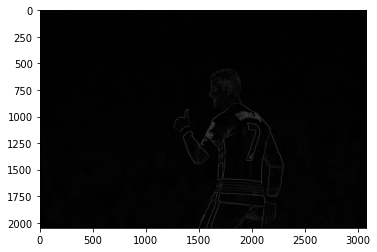

In [ ]:
print_img('4k/bicho_bordes.jpg')

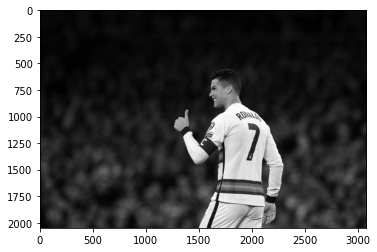

In [ ]:
print_img('gris.png')